<a href="https://colab.research.google.com/github/rrl7012005/Competitions-and-Datasets/blob/main/Kaggle_Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import os

In [ ]:
!pip install opendatasets

#Data Inspection and Visualization

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/competitions/spaceship-titanic/data')

Skipping, found downloaded files in "./spaceship-titanic" (use force=True to force download)


In [ ]:
os.listdir('spaceship-titanic')

['test.csv', 'train.csv', 'sample_submission.csv']

In [ ]:
train_df = pd.read_csv('./spaceship-titanic/train.csv')
test_df = pd.read_csv('./spaceship-titanic/test.csv')
submission_df = pd.read_csv('./spaceship-titanic/sample_submission.csv')

In [ ]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
print(train_df.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [ ]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train_df.shape

(8693, 14)

In [ ]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [ ]:
for i in categorical_cols:
  print(i, train_df[i].unique(), train_df[i].nunique())

HomePlanet ['Europa' 'Earth' 'Mars' nan] 3
CryoSleep [False True nan] 2
Cabin ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 6560
Destination ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 3
VIP [False True nan] 2
Name ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre'] 8473


1. Passenger id is useless, but the group (first 4 numbers, may matter, should inspect test data and see if groups are similar).
2. HomePlanet there are 3 categories and a nan (One Hot Encode, no Impute)
3. CryoSleep has 2 catgories (True, False and a nan, so One Hot Encode)
4. There are 6560 different cabins (should probably split into 3 different categories)
5. There are 3 destinations and a nan (One Hot Encode, no Impute)
6. VIP: has a nan and 2 categories True, False (One Hot)
7. Age: Lots of nans (Impute)
8. RoomService: possible outliers, investigate (Impute)
9. FoodCourt, ShoppingMall, Spa, VRDeck same thing
8. Name: I dont think name has much of an effect (can test it, based on first and last name, and check if names are in test data).

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
print(test_df.isna().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [ ]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [ ]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


Seems like passenger group and player id may matter. We need to graph distributions.

In [ ]:
for i in categorical_cols:
  print(i, test_df[i].unique(), test_df[i].nunique())

HomePlanet ['Earth' 'Europa' 'Mars' nan] 3
CryoSleep [True False nan] 2
Cabin ['G/3/S' 'F/4/S' 'C/0/S' ... 'D/296/P' 'D/297/P' 'G/1498/S'] 3265
Destination ['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan] 3
VIP [False nan True] 2
Name ['Nelly Carsoning' 'Lerome Peckers' 'Sabih Unhearfus' ... 'Jayrin Pore'
 'Kitakan Conale' 'Lilace Leonzaley'] 4176


**Correlations**

In [ ]:
target_df = train_df['Transported']
target_df = target_df.astype(int)
target_df

,Transported
0,0
1,1
2,0
3,0
4,1
...,...
8688,0
8689,0
8690,1
8691,0


In [ ]:
numerical_df = train_df[numerical_cols] #only includes the numeric data
numerical_df.corrwith(target_df)

,0
Age,-0.075026
RoomService,-0.244611
FoodCourt,0.046566
ShoppingMall,0.010141
Spa,-0.221131
VRDeck,-0.207075


There is a negative correlation with the VRDeck, Spa, Room Service.

There is negligible correlation with age, Foodcourt, shopping mall.

Lets check if first and last names have any correlation with transported.

##Names

In [ ]:
train_df[['First_Name', 'Last_Name']] = train_df['Name'].str.split(' ', n=1, expand=True)

train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,First_Name,Last_Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Gravior,Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Kurta,Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Fayey,Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Celeon,Hontichre


In [ ]:
train_df.First_Name.nunique(), train_df.Last_Name.nunique(), train_df.Name.nunique()

(2706, 2217, 8473)

In [ ]:
max(train_df.First_Name.value_counts()), max(train_df.Last_Name.value_counts())

(13, 18)

In [ ]:
next(iter(train_df.groupby('First_Name')))

('Aard',
      PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
 5633     5988_01       Mars     False  F/1235/P  55 Cancri e  44.0  False   
 
       RoomService  FoodCourt  ShoppingMall   Spa  VRDeck        Name  \
 5633       2956.0        0.0          10.0  12.0   692.0  Aard Curle   
 
       Transported First_Name Last_Name  
 5633        False       Aard     Curle  )

In [ ]:
name_proportions = train_df.groupby('First_Name')['Transported'].mean().reset_index()
name_proportions.columns = ['First_Name', 'Proportion']


name_frequencies = train_df['First_Name'].value_counts().reset_index()
name_frequencies.columns = ['First_Name', 'Frequency']

name_proportions = pd.merge(name_proportions, name_frequencies, on='First_Name')

name_proportions = name_proportions.sort_values('Frequency', ascending=False)
name_proportions

,First_Name,Proportion,Frequency
1282,Idace,0.153846,13
1568,Loree,0.583333,12
1442,Kaye,0.545455,11
703,Dandra,0.363636,11
1168,Gwendy,0.363636,11
...,...,...,...
983,Forn,0.000000,1
981,Fomamak,0.000000,1
980,Fomam,0.000000,1
976,Flynx,1.000000,1


In [ ]:
fig = px.scatter(
    name_proportions,
    x='Frequency',
    y='Proportion',
    text='First_Name',  # Hover text
    title='Scatter Plot of Proportion vs. Frequency',
    labels={'Frequency': 'Frequency of First Name', 'Proportion': 'Proportion of Transported'}
)

fig.update_traces(
    textposition='top center',  # Ensure no permanent text labels are shown
    hovertemplate='<b>%{text}</b><br>Frequency: %{x}<br>Proportion: %{y}<extra></extra>'  # Customize hover text
)

fig.update_layout(
    xaxis_title='Frequency of First Name',
    yaxis_title='Proportion of Transported',
    title='Scatter Plot of Proportion vs. Frequency'
)

fig.show()

In [ ]:
name_proportions = train_df.groupby('Last_Name')['Transported'].mean().reset_index()
name_proportions.columns = ['Last_Name', 'Proportion']

name_frequencies = train_df['Last_Name'].value_counts().reset_index()
name_frequencies.columns = ['Last_Name', 'Frequency']

name_proportions = pd.merge(name_proportions, name_frequencies, on='Last_Name')
name_proportions = name_proportions.sort_values('Frequency', ascending=False)

name_proportions

,Last_Name,Proportion,Frequency
356,Casonston,0.388889,18
1447,Oneiles,0.375000,16
1205,Litthews,0.266667,15
604,Domington,0.933333,15
818,Garnes,0.357143,14
...,...,...,...
1931,Steen,1.000000,1
687,Fandomatty,1.000000,1
1723,Robbson,0.000000,1
685,Fanbox,1.000000,1


In [ ]:
fig = px.scatter(
    name_proportions,
    x='Frequency',
    y='Proportion',
    text='Last_Name',  # Hover text
    title='Scatter Plot of Proportion vs. Frequency',
    labels={'Frequency': 'Frequency of Last Name', 'Proportion': 'Proportion of Transported'}
)

fig.update_traces(
    textposition='top center',  # Ensure no permanent text labels are shown
    hovertemplate='<b>%{text}</b><br>Frequency: %{x}<br>Proportion: %{y}<extra></extra>'  # Customize hover text
)

fig.update_layout(
    xaxis_title='Frequency of Last Name',
    yaxis_title='Proportion of Transported',
    title='Scatter Plot of Proportion vs. Frequency'
)

fig.show()

There seems to be some correlation, but for simplicity lets ignore it, its too much of a headache then. Or we could only consider a few. Perhaps we could treat it as:

Violan and Idace and Others for first names

Domington and Others for last names.

First lets check this is actually in the training data.

In [ ]:
test_df[['First_Name', 'Last_Name']] = test_df['Name'].str.split(' ', n=1, expand=True)

test_df[test_df['Last_Name'] == 'Domington']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,First_Name,Last_Name
3607,7867_01,Earth,False,F/1631/P,TRAPPIST-1e,36.0,False,100.0,680.0,1.0,90.0,0.0,Gretty Domington,Gretty,Domington
3772,8249_01,Earth,False,F/1698/P,TRAPPIST-1e,15.0,False,1949.0,2.0,NaN,0.0,32.0,Armene Domington,Armene,Domington


In [ ]:
print(test_df.isna().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
First_Name       94
Last_Name        94
dtype: int64


##Passenger Id

In [ ]:
train_df[['GroupId', 'PlayerId']] = train_df['PassengerId'].str.split('_', n=1, expand=True)
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,First_Name,Last_Name,GroupId,PlayerId
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Maham,Ofracculy,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Juanna,Vines,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Altark,Susent,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,Solam,Susent,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,Willy,Santantines,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,Gravior,Noxnuther,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,Kurta,Mondalley,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,Fayey,Connon,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,Celeon,Hontichre,9280,01


In [ ]:
print(train_df.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
First_Name      200
Last_Name       200
GroupId           0
PlayerId          0
dtype: int64


In [ ]:
# sns.countplot(x='GroupId', hue='Transported', data=train_df)

There seems to be a very weak correlation with only certain groups exhibitting strong correlations. What about playerid.

<Axes: xlabel='PlayerId', ylabel='count'>

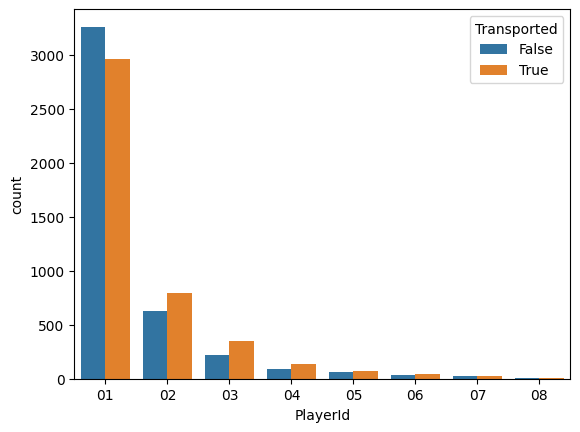

In [ ]:
sns.countplot(x='PlayerId', hue='Transported', data=train_df)

Seems to be more or less the same. Perhaps remove it initially.

##Cabin

In [ ]:
train_df[['Deck', 'Number', 'Side']] = train_df['Cabin'].str.split('/', n=2, expand=True)
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,First_Name,Last_Name,GroupId,PlayerId,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,Maham,Ofracculy,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,Juanna,Vines,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,Altark,Susent,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,Solam,Susent,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,Willy,Santantines,0004,01,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,74.0,Gravior Noxnuther,False,Gravior,Noxnuther,9276,01,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0.0,Kurta Mondalley,False,Kurta,Mondalley,9278,01,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0.0,Fayey Connon,True,Fayey,Connon,9279,01,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,3235.0,Celeon Hontichre,False,Celeon,Hontichre,9280,01,E,608,S


In [ ]:
print(train_df.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
First_Name      200
Last_Name       200
GroupId           0
PlayerId          0
Deck            199
Number          199
Side            199
dtype: int64


In [ ]:
train_df.Deck.unique(), train_df.Number.info(), train_df.Side.unique()

<class 'pandas.core.series.Series'>
RangeIndex: 8693 entries, 0 to 8692
Series name: Number
Non-Null Count  Dtype 
--------------  ----- 
8494 non-null   object
dtypes: object(1)
memory usage: 68.0+ KB


(array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object),
 None,
 array(['P', 'S', nan], dtype=object))

##Numerical Values

First inspect their distribution

In [ ]:
train_df[numerical_cols]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
fig = px.histogram(train_df, x='Age')
fig.show()

In [ ]:
fig = px.histogram(train_df, x='RoomService')
fig.show()

In [ ]:
fig = px.histogram(train_df, x='FoodCourt')
fig.show()

In [ ]:
fig = px.histogram(train_df, x='ShoppingMall')
fig.show()

In [ ]:
fig = px.histogram(train_df, x='Spa')
fig.show()

In [ ]:
fig = px.histogram(train_df, x='VRDeck')
fig.show()

All data looks good. Lets check the output

<Axes: xlabel='Transported', ylabel='count'>

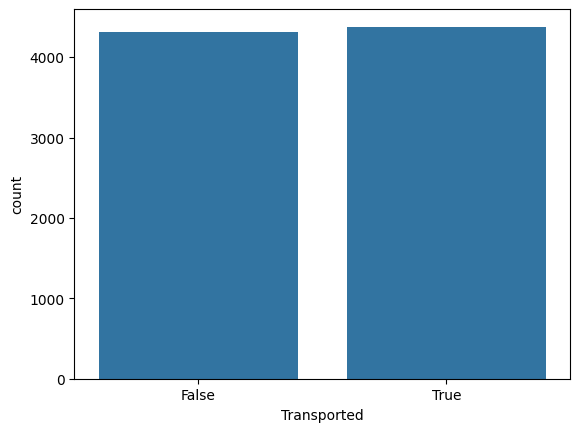

In [ ]:
sns.countplot(x='Transported', data=train_df)

No class imbalance, all things look good.

#Data Preprocessing

Lets create our validation set

In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

train_df.shape, val_df.shape

((6954, 21), (1739, 21))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6954 non-null   object 
 1   HomePlanet    6786 non-null   object 
 2   CryoSleep     6777 non-null   object 
 3   Cabin         6796 non-null   object 
 4   Destination   6815 non-null   object 
 5   Age           6806 non-null   float64
 6   VIP           6792 non-null   object 
 7   RoomService   6828 non-null   float64
 8   FoodCourt     6814 non-null   float64
 9   ShoppingMall  6789 non-null   float64
 10  Spa           6820 non-null   float64
 11  VRDeck        6803 non-null   float64
 12  Name          6795 non-null   object 
 13  Transported   6954 non-null   bool   
 14  First_Name    6795 non-null   object 
 15  Last_Name     6795 non-null   object 
 16  GroupId       6954 non-null   object 
 17  PlayerId      6954 non-null   object 
 18  Deck          6796 non-null   

#Imputation and One Hot Encoding

In [ ]:
print(numerical_cols)

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [ ]:
test_df[['Deck', 'Number', 'Side']] = test_df['Cabin'].str.split('/', n=2, expand=True)

In [ ]:
test_df[['GroupId', 'PlayerId']] = test_df['PassengerId'].str.split('_', n=1, expand=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

train_df[numerical_cols] = imputer.fit_transform(train_df[numerical_cols])

val_df[numerical_cols] = imputer.transform(val_df[numerical_cols])
train_df[numerical_cols] = imputer.transform(train_df[numerical_cols])
test_df[numerical_cols] = imputer.transform(test_df[numerical_cols])

In [ ]:
print(test_df.isna().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
First_Name       94
Last_Name        94
Deck            100
Number          100
Side            100
GroupId           0
PlayerId          0
dtype: int64


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6954 non-null   object 
 1   HomePlanet    6786 non-null   object 
 2   CryoSleep     6777 non-null   object 
 3   Cabin         6796 non-null   object 
 4   Destination   6815 non-null   object 
 5   Age           6954 non-null   float64
 6   VIP           6792 non-null   object 
 7   RoomService   6954 non-null   float64
 8   FoodCourt     6954 non-null   float64
 9   ShoppingMall  6954 non-null   float64
 10  Spa           6954 non-null   float64
 11  VRDeck        6954 non-null   float64
 12  Name          6795 non-null   object 
 13  Transported   6954 non-null   bool   
 14  First_Name    6795 non-null   object 
 15  Last_Name     6795 non-null   object 
 16  GroupId       6954 non-null   object 
 17  PlayerId      6954 non-null   object 
 18  Deck          6796 non-null   

In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 304 to 6093
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1739 non-null   object 
 1   HomePlanet    1706 non-null   object 
 2   CryoSleep     1699 non-null   object 
 3   Cabin         1698 non-null   object 
 4   Destination   1696 non-null   object 
 5   Age           1739 non-null   float64
 6   VIP           1698 non-null   object 
 7   RoomService   1739 non-null   float64
 8   FoodCourt     1739 non-null   float64
 9   ShoppingMall  1739 non-null   float64
 10  Spa           1739 non-null   float64
 11  VRDeck        1739 non-null   float64
 12  Name          1698 non-null   object 
 13  Transported   1739 non-null   bool   
 14  First_Name    1698 non-null   object 
 15  Last_Name     1698 non-null   object 
 16  GroupId       1739 non-null   object 
 17  PlayerId      1739 non-null   object 
 18  Deck          1698 non-null   o

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4183 non-null   object 
 13  First_Name    4183 non-null   object 
 14  Last_Name     4183 non-null   object 
 15  Deck          4177 non-null   object 
 16  Number        4177 non-null   object 
 17  Side          4177 non-null   object 
 18  GroupId       4277 non-null 

Now we need to one hot encode

In [ ]:
print(test_df.isna().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
First_Name       94
Last_Name        94
Deck            100
Number          100
Side            100
GroupId           0
PlayerId          0
dtype: int64


In [ ]:
most_frequent_cabin = train_df['Number'].mode()[0]
train_df['Number'] = train_df['Number'].fillna(most_frequent_cabin)
val_df['Number'] = val_df['Number'].fillna(most_frequent_cabin)
test_df['Number'] = test_df['Number'].fillna(most_frequent_cabin)

In [ ]:
train_df.fillna('missing', inplace=True)
val_df.fillna('missing', inplace=True)
test_df.fillna('missing', inplace=True)

In [ ]:
print(test_df.isna().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
First_Name      0
Last_Name       0
Deck            0
Number          0
Side            0
GroupId         0
PlayerId        0
dtype: int64


In [ ]:
train_df.info(), val_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6954 non-null   object 
 1   HomePlanet    6954 non-null   object 
 2   CryoSleep     6954 non-null   object 
 3   Cabin         6954 non-null   object 
 4   Destination   6954 non-null   object 
 5   Age           6954 non-null   float64
 6   VIP           6954 non-null   object 
 7   RoomService   6954 non-null   float64
 8   FoodCourt     6954 non-null   float64
 9   ShoppingMall  6954 non-null   float64
 10  Spa           6954 non-null   float64
 11  VRDeck        6954 non-null   float64
 12  Name          6954 non-null   object 
 13  Transported   6954 non-null   bool   
 14  First_Name    6954 non-null   object 
 15  Last_Name     6954 non-null   object 
 16  GroupId       6954 non-null   object 
 17  PlayerId      6954 non-null   object 
 18  Deck          6954 non-null   

(None, None, None)

In [ ]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'PlayerId']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

train_df[categorical_cols] = train_df[categorical_cols].astype(str)
val_df[categorical_cols] = val_df[categorical_cols].astype(str)
test_df[categorical_cols] = test_df[categorical_cols].astype(str)

ohe.fit(train_df[categorical_cols])

train_encoded = ohe.transform(train_df[categorical_cols])
val_encoded = ohe.transform(val_df[categorical_cols])
test_encoded = ohe.transform(test_df[categorical_cols])

train_encoded = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out(categorical_cols))
val_encoded = pd.DataFrame(val_encoded, columns=ohe.get_feature_names_out(categorical_cols))
test_encoded = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out(categorical_cols))

train_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_missing,CryoSleep_False,CryoSleep_True,CryoSleep_missing,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,Side_S,Side_missing,PlayerId_01,PlayerId_02,PlayerId_03,PlayerId_04,PlayerId_05,PlayerId_06,PlayerId_07,PlayerId_08
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6950,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6951,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6952,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df_non_cat = train_df.drop(columns=categorical_cols)
val_df_non_cat = val_df.drop(columns=categorical_cols)
test_df_non_cat = test_df.drop(columns=categorical_cols)

# Concatenate original features with one-hot encoded features
train_df = pd.concat([train_df_non_cat.reset_index(drop=True), train_encoded.reset_index(drop=True)], axis=1)
val_df = pd.concat([val_df_non_cat.reset_index(drop=True), val_encoded.reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df_non_cat.reset_index(drop=True), test_encoded.reset_index(drop=True)], axis=1)

In [ ]:
train_df.isna().sum(), val_df.isna().sum(), test_df.isna().sum()

(PassengerId                  0
 Cabin                        0
 Age                          0
 RoomService                  0
 FoodCourt                    0
 ShoppingMall                 0
 Spa                          0
 VRDeck                       0
 Name                         0
 Transported                  0
 First_Name                   0
 Last_Name                    0
 GroupId                      0
 Number                       0
 HomePlanet_Earth             0
 HomePlanet_Europa            0
 HomePlanet_Mars              0
 HomePlanet_missing           0
 CryoSleep_False              0
 CryoSleep_True               0
 CryoSleep_missing            0
 Destination_55 Cancri e      0
 Destination_PSO J318.5-22    0
 Destination_TRAPPIST-1e      0
 Destination_missing          0
 VIP_False                    0
 VIP_True                     0
 VIP_missing                  0
 Deck_A                       0
 Deck_B                       0
 Deck_C                       0
 Deck_D 

In [ ]:
train_df.info(), val_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                6954 non-null   object 
 1   Cabin                      6954 non-null   object 
 2   Age                        6954 non-null   float64
 3   RoomService                6954 non-null   float64
 4   FoodCourt                  6954 non-null   float64
 5   ShoppingMall               6954 non-null   float64
 6   Spa                        6954 non-null   float64
 7   VRDeck                     6954 non-null   float64
 8   Name                       6954 non-null   object 
 9   Transported                6954 non-null   bool   
 10  First_Name                 6954 non-null   object 
 11  Last_Name                  6954 non-null   object 
 12  GroupId                    6954 non-null   object 
 13  Number                     6954 non-null   objec

(None, None, None)

In [ ]:
train_df

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,Side_S,Side_missing,PlayerId_01,PlayerId_02,PlayerId_03,PlayerId_04,PlayerId_05,PlayerId_06,PlayerId_07,PlayerId_08
0,2513_01,missing,28.0,0.000000,55.0,0.0,656.0,0.0,Loree Mathison,False,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2774_02,F/575/P,17.0,0.000000,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8862_04,C/329/S,28.0,0.000000,0.0,0.0,0.0,0.0,Alramix Myling,True,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8736_02,F/1800/P,20.0,222.822935,2.0,289.0,976.0,0.0,Tros Pota,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0539_02,C/18/P,36.0,0.000000,0.0,0.0,0.0,0.0,Achyon Nalanet,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,6076_01,G/988/S,18.0,14.000000,2.0,144.0,610.0,0.0,Therry Cames,True,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6950,5537_01,F/1063/S,50.0,690.000000,0.0,30.0,762.0,428.0,Herms Bancy,False,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6951,5756_06,F/1194/P,22.0,158.000000,0.0,476.0,0.0,26.0,Karena Briggston,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6952,0925_01,F/191/P,34.0,379.000000,0.0,1626.0,0.0,0.0,Skix Kraie,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.columns

Index(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'First_Name',
       'Last_Name', 'GroupId', 'Number', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_missing',
       'CryoSleep_False', 'CryoSleep_True', 'CryoSleep_missing',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Destination_missing', 'VIP_False',
       'VIP_True', 'VIP_missing', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_missing', 'Side_P',
       'Side_S', 'Side_missing', 'PlayerId_01', 'PlayerId_02', 'PlayerId_03',
       'PlayerId_04', 'PlayerId_05', 'PlayerId_06', 'PlayerId_07',
       'PlayerId_08'],
      dtype='object')

**Scaling**

In [ ]:
numerical_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_num_cols = ['GroupId', 'Number', 'First_Name', 'Last_Name']
categorical_cols = ['HomePlanet_Earth',
       'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_missing',
       'CryoSleep_False', 'CryoSleep_True', 'CryoSleep_missing',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'Destination_missing', 'VIP_False',
       'VIP_True', 'VIP_missing', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_missing', 'Side_P',
       'Side_S', 'Side_missing', 'PlayerId_01', 'PlayerId_02', 'PlayerId_03',
       'PlayerId_04', 'PlayerId_05', 'PlayerId_06', 'PlayerId_07',
       'PlayerId_08']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
val_df[numerical_cols] = scaler.transform(val_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

(               Age  RoomService    FoodCourt  ShoppingMall          Spa  \
 count  6954.000000  6954.000000  6954.000000   6954.000000  6954.000000   
 mean      0.364913     0.015553     0.016474      0.007471     0.016998   
 std       0.180909     0.046678     0.056230      0.025823     0.059619   
 min       0.000000     0.000000     0.000000      0.000000     0.000000   
 25%       0.253165     0.000000     0.000000      0.000000     0.000000   
 50%       0.341772     0.000000     0.000000      0.000000     0.000000   
 75%       0.468354     0.005025     0.004680      0.001958     0.004819   
 max       1.000000     1.000000     1.000000      1.000000     1.000000   
 
             VRDeck  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
 count  6954.000000       6954.000000        6954.000000      6954.000000   
 mean      0.012605          0.530774           0.244751         0.200316   
 std       0.047978          0.499088           0.429971         0.400266   
 min  

In [ ]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_missing,...,Side_S,Side_missing,PlayerId_01,PlayerId_02,PlayerId_03,PlayerId_04,PlayerId_05,PlayerId_06,PlayerId_07,PlayerId_08
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,...,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,0.362807,0.015309,0.015868,0.007545,0.016334,0.012870,0.529109,0.234276,0.216273,0.020341,...,0.489362,0.023381,0.716156,0.169044,0.062895,0.025018,0.013093,0.007716,0.004676,0.001403
std,0.177562,0.041960,0.054417,0.023598,0.059440,0.051186,0.499210,0.423595,0.411751,0.141182,...,0.499945,0.151128,0.450915,0.374834,0.242802,0.156197,0.113688,0.087510,0.068230,0.037433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341772,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.468354,0.005514,0.005158,0.002171,0.004469,0.002196,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.807357,0.911626,0.352971,1.068490,0.922886,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Model Training

In [ ]:
X_train = train_df[categorical_cols + numerical_cols]
y_train = train_df['Transported']

X_val = val_df[categorical_cols + numerical_cols]
y_val = val_df['Transported']

X_test = test_df[categorical_cols + numerical_cols]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((6954, 41), (6954,), (1739, 41), (1739,), (4277, 41))

In [ ]:
X_train.dtypes

,0
HomePlanet_Earth,float64
HomePlanet_Earth,float64
HomePlanet_Europa,float64
HomePlanet_Mars,float64
HomePlanet_missing,float64
CryoSleep_False,float64
CryoSleep_True,float64
CryoSleep_missing,float64
Destination_55 Cancri e,float64
Destination_PSO J318.5-22,float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.76
Confusion Matrix:
[[692 169]
 [244 634]]
Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.80      0.77       861
        True       0.79      0.72      0.75       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
y_pred = np.ones_like(y_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_val, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.50
Confusion Matrix:
[[  0 861]
 [  0 878]]
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       861
        True       0.50      1.00      0.67       878

    accuracy                           0.50      1739
   macro avg       0.25      0.50      0.34      1739
weighted avg       0.25      0.50      0.34      1739



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
def log_reg(X_train, y_train, X_val, y_val, **params):
  model = LogisticRegression(**params)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_val)

  print("Parameters: ", **params)

  accuracy = accuracy_score(y_val, y_pred)
  print(f'Accuracy: {accuracy:.2f}')

  conf_matrix = confusion_matrix(y_val, y_pred)
  print('Confusion Matrix:')
  print(conf_matrix)

  class_report = classification_report(y_val, y_pred)
  print('Classification Report:')
  print(class_report)

  return accuracy, conf_matrix, class_report

In [ ]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs'],
    'class_weight': [None, 'balanced'],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

Best parameters found:  {'C': 10.0, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.79


Polynomial Log Reg

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=True)

log_reg = LogisticRegression(random_state=42)

pipeline = Pipeline([
    ('poly', poly),
    ('log_reg', log_reg)
])

pipeline.fit(X_train, y_train)

y_val_pred = pipeline.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy on Validation Set: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_val, y_val_pred))

Accuracy on Validation Set: 0.78
Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.79      0.78       861
        True       0.79      0.78      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'poly__degree': [2, 3, 4],
    'log_reg__C': [0.1, 1.0, 10.0],
    'log_reg__penalty': ['l2'],
}

pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=True)),
    ('log_reg', LogisticRegression(random_state=42))
])

grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

# Evaluate on the validation set
y_val_pred = grid_search.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Accuracy on Validation Set: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_val, y_val_pred))

Fitting 2 folds for each of 9 candidates, totalling 18 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.kernel_approximation import RBFSampler
import numpy as np

def rbf_reg(X_train, X_val, y_train, y_val, g):
  rbf_feature = RBFSampler(gamma=g, random_state=42)
  X_train_rbf = rbf_feature.fit_transform(X_train)
  X_val_rbf = rbf_feature.transform(X_val)

  model = LogisticRegression()
  model.fit(X_train_rbf, y_train)

  y_val_pred = model.predict(X_val_rbf)
  accuracy = accuracy_score(y_val, y_val_pred)

  print(g, "ACCURACY", accuracy)
  return accuracy

acc = []
gams = []
for i in range(100):
  print("ITERATION ", i)
  g = np.random.rand() * 1000
  gams.append(g)
  acc.append(rbf_reg(X_train, X_val, y_train, y_val, g))

print(f"At gamma = {gams[acc.index(max(acc))]} ACCURACY IS {max(acc)}")

ITERATION  0
875.0398990783913 ACCURACY 0.5462909718228867
ITERATION  1
260.09190267546245 ACCURACY 0.5675675675675675
ITERATION  2
165.43436981875948 ACCURACY 0.5687176538240368
ITERATION  3
552.7155484051917 ACCURACY 0.5612420931569868
ITERATION  4
638.4442701807 ACCURACY 0.5451408855664175
ITERATION  5
951.7637189403828 ACCURACY 0.5480161012075906
ITERATION  6
362.95261114956503 ACCURACY 0.5365152386428982
ITERATION  7
777.1650976398685 ACCURACY 0.5434157561817137
ITERATION  8
551.8624053859976 ACCURACY 0.5589419206440484
ITERATION  9
616.1653936157576 ACCURACY 0.5405405405405406
ITERATION  10
59.72610981001647 ACCURACY 0.5894192064404831
ITERATION  11
498.13746561579376 ACCURACY 0.5255894192064405
ITERATION  12
700.2445065760558 ACCURACY 0.5382403680276021
ITERATION  13
106.35832311750171 ACCURACY 0.5681426106958022
ITERATION  14
264.0209554040838 ACCURACY 0.577343300747556
ITERATION  15
724.5379807180865 ACCURACY 0.5215641173087981
ITERATION  16
940.37309796325 ACCURACY 0.52846463

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 10],
    'criterion': ['gini', 'entropy']
}

X_train = train_df[categorical_cols + ['GroupId', 'Number'] + numerical_cols]
y_train = train_df['Transported']

X_val = val_df[categorical_cols + ['GroupId', 'Number'] + numerical_cols]
y_val = val_df['Transported']

X_test = test_df[categorical_cols + ['GroupId', 'Number'] + numerical_cols]

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.77


In [ ]:
X_combined.isna().sum()

,0
HomePlanet_Earth,0
HomePlanet_Earth,0
HomePlanet_Europa,0
HomePlanet_Mars,0
HomePlanet_missing,0
CryoSleep_False,0
CryoSleep_True,0
CryoSleep_missing,0
Destination_55 Cancri e,0
Destination_PSO J318.5-22,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)

print("ACuracy", accuracy)

ACuracy 0.7987349051178838


In [ ]:
y_pred = rf_clf.predict(X_test)

submission_df['Transported']  = y_pred
submission_df.to_csv('submission.csv', index=None)
submission_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


Graidne tboosting

In [ ]:
import xgboost as xgb

X_train_np = X_train.values
y_train_np = y_train.values

xgb_clf = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_clf.fit(X_train_np, y_train_np)

# Predict on the test set
y_pred = xgb_clf.predict(X_val.values)

# Evaluate the model
accuracy = accuracy_score(y_val.values, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7872340425531915
